<a href="https://colab.research.google.com/github/Rithwik084/Stock-Price-Predictor/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#STOCK MARTKET PREDICTION

##Dataset Processing

In [ ]:
!pip install yfinance

In [ ]:
import pandas as pd
import numpy as np

import yfinance as yf

import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline

from sklearn.model_selection import train_test_split

In [ ]:
stocks = input("Enter the code of the stock: ")
data = yf.download(stocks, "2011-01-01", "2024-08-01", auto_adjust = True)
data.head()

Enter the code of the stock: ZOMATO.BO


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2021-07-23,115.000000,138.000000,114.000000,125.849998,45171380
2021-07-26,126.000000,143.750000,125.500000,140.850006,12001500
2021-07-27,141.550003,147.800003,127.800003,132.600006,19253990
2021-07-28,132.300003,134.899994,123.599998,131.600006,8306124
2021-07-29,134.699997,144.000000,132.199997,141.699997,11900730


In [ ]:
data.shape

(728, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 728 entries, 2021-07-23 to 2024-07-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    728 non-null    float64
 1   High    728 non-null    float64
 2   Low     728 non-null    float64
 3   Close   728 non-null    float64
 4   Volume  728 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 34.1 KB


In [ ]:
data.describe()

,Open,High,Low,Close,Volume
count,728.000000,728.000000,728.000000,728.000000,7.280000e+02
mean,105.492006,107.632651,103.016154,105.261030,6.232113e+06
std,47.216046,47.973198,46.107835,47.207454,3.047552e+07
min,40.950001,44.400002,40.549999,41.650002,3.178900e+05
25%,63.299999,64.787502,62.257499,63.250000,1.813459e+06
50%,93.825001,95.599998,91.430000,93.575001,3.000656e+06
75%,137.749996,139.724998,134.012497,137.462498,5.005624e+06
max,230.000000,232.000000,226.000000,229.500000,7.179917e+08


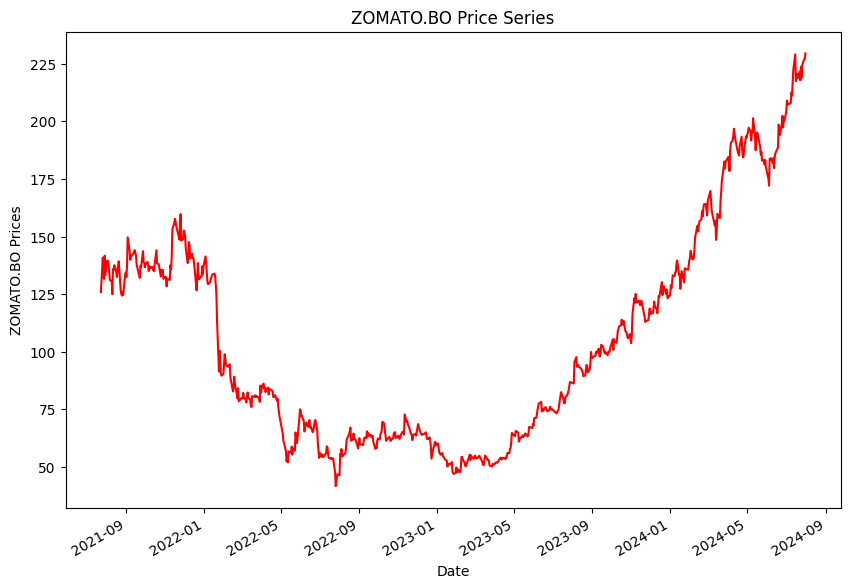

In [ ]:
data.Close.plot(figsize=(10,7), color="r")
plt.ylabel("{} Prices".format(stocks))
plt.title("{} Price Series".format(stocks))
plt.show()

<ipython-input-8-daae21fed2ea>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Open"])


<Axes: xlabel='Open', ylabel='Density'>

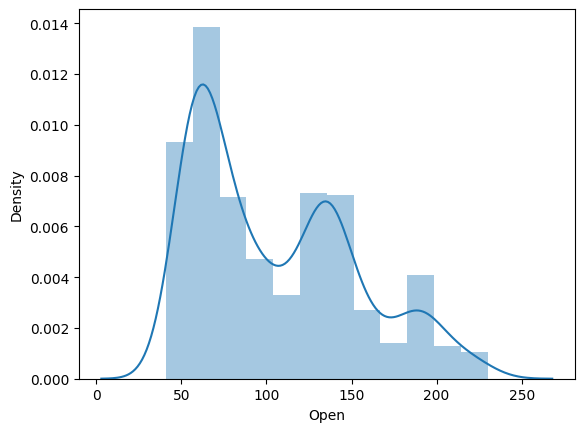

In [ ]:
sns.distplot(data["Open"])

<ipython-input-9-7576e4f36f65>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Close"])


<Axes: xlabel='Close', ylabel='Density'>

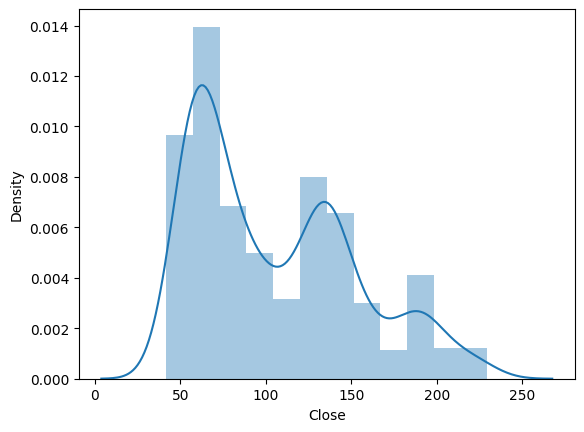

In [ ]:
sns.distplot(data["Close"])

<ipython-input-10-f105f0b633a7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["High"])


<Axes: xlabel='High', ylabel='Density'>

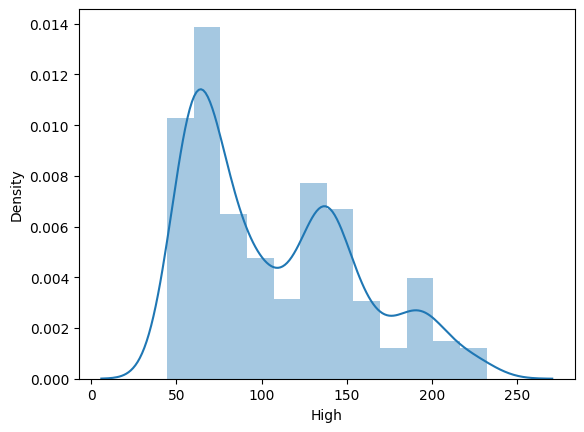

In [ ]:
sns.distplot(data["High"])

<ipython-input-11-93aae402e9ce>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Low"])


<Axes: xlabel='Low', ylabel='Density'>

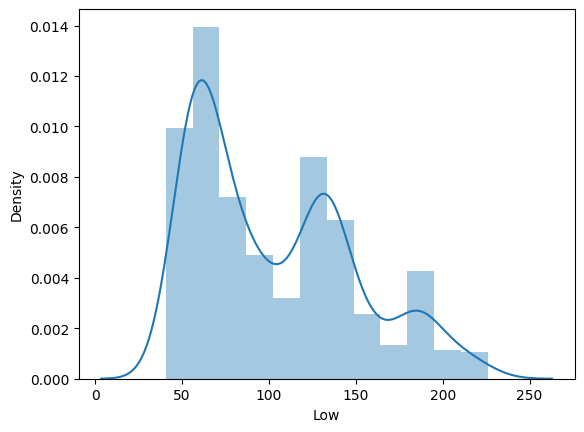

In [ ]:
sns.distplot(data["Low"])

<ipython-input-12-2896601382ac>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Volume"])


<Axes: xlabel='Volume', ylabel='Density'>

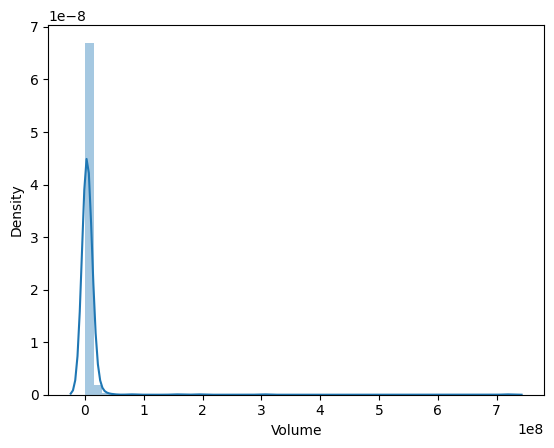

In [ ]:
sns.distplot(data["Volume"])

In [ ]:
x = data.drop("Close", axis=1)
y =data["Close"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(582, 4)
(146, 4)
(582,)
(146,)


##Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred1 = lr.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

def calculate_metrics(y_test, y_pred):
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  r2score = r2_score(y_test, y_pred)

  print("MSE: ", mse)
  print("RMSE: ", rmse)
  print("R2 SCORE: ", r2score)

calculate_metrics(y_test, pred1)

MSE:  1.4024609533096222
RMSE:  1.1842554425923582
R2 SCORE:  0.9993743093035518


In [ ]:
from sklearn.linear_model import Lasso, Ridge

la = Lasso().fit(x_train,y_train)
ri = Ridge().fit(x_train,y_train)
pred2 = la.predict(x_test)
pred3 = ri.predict(x_test)

In [ ]:
calculate_metrics(y_test, pred2)

MSE:  63.12225750672954
RMSE:  7.944951699458565
R2 SCORE:  0.9993922155273458


In [ ]:
calculate_metrics(y_test, pred3)

MSE:  1.402611820406617
RMSE:  1.1843191379043982
R2 SCORE:  0.999374241996053


##SVM

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR()
param_grid = {"C":[0.1,1,10,100,1000],
              "gamma":[1,0.1,0.01,0.001,0.0001],
              "kernel":["rbf"]}

grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=3)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.004 total time=   0.6s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.025 total time=   0.6s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.044 total time=   0.6s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.041 total time=   0.6s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.020 total time=   0.6s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.004 total time=   0.6s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.025 total time=   0.5s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.044 total time=   0.4s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.041 total time=   0.6s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.020 total time=   0.6s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.004 total time=   0.6s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
grid.best_estimator_

SVR(C=1000, gamma=0.0001)

In [ ]:
svr = SVR(C=1000, gamma=0.0001, kernel="rbf")
svr.fit(x_train, y_train)
svr_pred = svr.predict(x_test)

##Export

In [ ]:
import joblib

joblib.dump(ri,'model.pkl')
ridge_from_joblib = joblib.load("model.pkl")